# Park Submetric

## Introduction

For our final project, we decided to base our best neighborhood in Pittsburgh according to our guidelines of the neighborhood with the best quality of life. Our group came up with this main metric after researching the available data sets that we could use for our submetric data. We found datasets about food, sidewalks, and parks that could be used to measure certain aspects of quality of life in different neighborhoods to find the best neighborhood.

## The Submetric
The submetric data I will be using to measure the neighborhood with the best quality of life is the City of Pittsburgh Parks data. I wanted to measure the best quality of life of a neighborhood by calculating each neighborhood's combined park area, and the best neighhorhood would be the one with the biggest combined park area, but my data did not contain the area for each park. My data did, however, contain which neighborhood the parks are located in, so I will be measuring the best quality of life of a neighborhood by calculating the number of parks in each neighborhood, and the neighborhood with the most parks is the best neighborhood.

## Visualization of Parks in Allegheny County

This map shows where all the parks are in Allegheny County, but it not very helpful with calculating how many parks in each neighborhood.

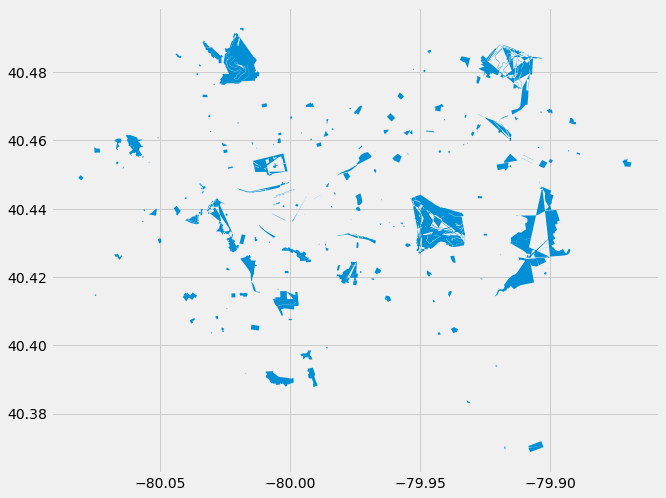

In [3]:
import matplotlib.pyplot as plt #import pyplot library for data visualization

# format and style
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [21, 8]

import geopandas as gpd
geoData = gpd.read_file("parkGeo.geojson")
geoData.plot()



## Calculations

<br>
Import pandas library to work with data sets

In [1]:
import pandas as pd

<br>
Load in the City of Pittsburgh Parks Data

In [4]:
data = pd.read_csv("parks.csv")

# look at the first ten rows of the data
data.head(10)

id                       name                   type  \
0  2111959181             Able Long Park                   Park   
1  1109513049    Albert Turk Graham Park                   Park   
2  1544096765                 Alcoa Park                   Park   
3  1212681573          Allegheny Commons                   Park   
4   954863286     Allegheny Landing Park                   Park   
5   223959093  Allegheny Riverfront Park                   Park   
6  1596467340        Alpine Gardens Park                   Park   
7  1829922263                 Alton Park                   Park   
8  2049886968             Amber Triangle  Traffic Island/Median   
9  1047118140                 Ammon Park                   Park   

  maintenance_responsibility  \
0           Parks - Southern   
1           Parks - Schenley   
2           Parks - Northern   
3           Parks - Northern   
4           Parks - Northern   
5           Parks - Northern   
6           Parks - Northern   
7           Parks - Southern   
8               2nd Division   
9           Parks - Schenley   

                                               image  \
0  https://tools.wprdc.org/images/pittsburgh/park...   
1  https://tools.wprdc.org/images/pittsburgh/park...   
2                                                NaN   
3                                                NaN   
4                                                NaN   
5                                                NaN   
6  https://tools.wprdc.org/images/pittsburgh/park...   
7                                                NaN   
8                                                NaN   
9                                                NaN   

                neighborhood  council_district  ward        tract  \
0                  Beechview                 4    19  42003192000   
1           Crawford-Roberts                 6     3  42003030500   
2                North Shore                 1    22  42003563200   
3           Allegheny Center                 1    22  42003562700   
4                North Shore                 1    22  42003563200   
5  Central Business District                 6     2  42003020100   
6          Central Northside                 6    25  42003250300   
7                  Beechview                 4    19  42003191600   
8               East Liberty                 7     8  42003111500   
9          Bedford Dwellings                 6     5  42003050900   

   public_works_division  pli_division  police_zone fire_zone   latitude  \
0                      5            19            6      4-28  40.408118   
1                      3             3            2       2-1  40.440507   
2                      6            22            1      1-20  40.447481   
3                      1            22            1       1-7  40.453126   
4                      6            22            1      1-20  40.447184   
5                      6             2            2       1-3  40.444591   
6                      1            25            1      1-21  40.457673   
7                      5            19            6      4-28  40.414580   
8                      2             8            5      3-23  40.459099   
9                      3             5            2       2-5  40.449526   

   longitude  
0 -80.028197  
1 -79.984018  
2 -80.001017  
3 -80.009158  
4 -80.002907  
5 -80.002416  
6 -80.012852  
7 -80.021855  
8 -79.931846  
9 -79.978247

<br>
Delete unwanted data. Data will only contain park name, type, and neighborhood which the park is located in. 

In [53]:
data1 = data[['name', 'type', 'neighborhood']]
data1.head(20)

name                   type  \
0              Able Long Park                   Park   
1     Albert Turk Graham Park                   Park   
2                  Alcoa Park                   Park   
3           Allegheny Commons                   Park   
4      Allegheny Landing Park                   Park   
5   Allegheny Riverfront Park                   Park   
6         Alpine Gardens Park                   Park   
7                  Alton Park                   Park   
8              Amber Triangle  Traffic Island/Median   
9                  Ammon Park                   Park   
10             Arlington Park                   Park   
11              Arlington Gym       Building Grounds   
12             Armstrong Park                   Park   
13               Arsenal Park                   Park   
14         August Wilson Park                   Park   
15            Banksville Park                   Park   
16     Banksville School Park                   Park   
17          Bates St Triangle  Traffic Island/Median   
18       Baum Negley Triangle  Traffic Island/Median   
19                Baxter Park                   Park   

                 neighborhood  
0                   Beechview  
1            Crawford-Roberts  
2                 North Shore  
3            Allegheny Center  
4                 North Shore  
5   Central Business District  
6           Central Northside  
7                   Beechview  
8                East Liberty  
9           Bedford Dwellings  
10          South Side Slopes  
11          South Side Slopes  
12           South Side Flats  
13        Lower Lawrenceville  
14           Crawford-Roberts  
15                 Banksville  
16                 Banksville  
17              South Oakland  
18               East Liberty  
19             Homewood North

<br>
Data must only contain parks that have the type park.

In [54]:
parkData = data1.loc[data1['type'] == "Park"] 
parkData.head(20)

name  type  \
0                                Able Long Park  Park   
1                       Albert Turk Graham Park  Park   
2                                    Alcoa Park  Park   
3                             Allegheny Commons  Park   
4                        Allegheny Landing Park  Park   
5                     Allegheny Riverfront Park  Park   
6                           Alpine Gardens Park  Park   
7                                    Alton Park  Park   
9                                    Ammon Park  Park   
10                               Arlington Park  Park   
12                               Armstrong Park  Park   
13                                 Arsenal Park  Park   
14                           August Wilson Park  Park   
15                              Banksville Park  Park   
16                       Banksville School Park  Park   
19                                  Baxter Park  Park   
22  Beechview Healthy Active Living Center Park  Park   
23                            Blair Street Park  Park   
24                                 Bon Air Park  Park   
25                         Boundary Street Park  Park   

                 neighborhood  
0                   Beechview  
1            Crawford-Roberts  
2                 North Shore  
3            Allegheny Center  
4                 North Shore  
5   Central Business District  
6           Central Northside  
7                   Beechview  
9           Bedford Dwellings  
10          South Side Slopes  
12           South Side Flats  
13        Lower Lawrenceville  
14           Crawford-Roberts  
15                 Banksville  
16                 Banksville  
19             Homewood North  
22                  Beechview  
23                  Hazelwood  
24                    Bon Air  
25            Central Oakland

<br>
Make a new dataFrame with the first column being all the unique neighborhood names. Another associated column will be the occurances of the neighborhood name within the park data.

In [16]:
nbhd = parkData['neighborhood'].value_counts()
nbhd.head(10)

South Side Slopes     6
Beechview             6
Hazelwood             5
Mount Washington      5
Troy Hill             5
Elliott               4
Marshall-Shadeland    4
East Liberty          4
Sheraden              4
Bloomfield            3
Name: neighborhood, dtype: int64

<br>
Plot the data in a bar graph for better data visualization

Text(0, 0.5, 'Number of Parks')

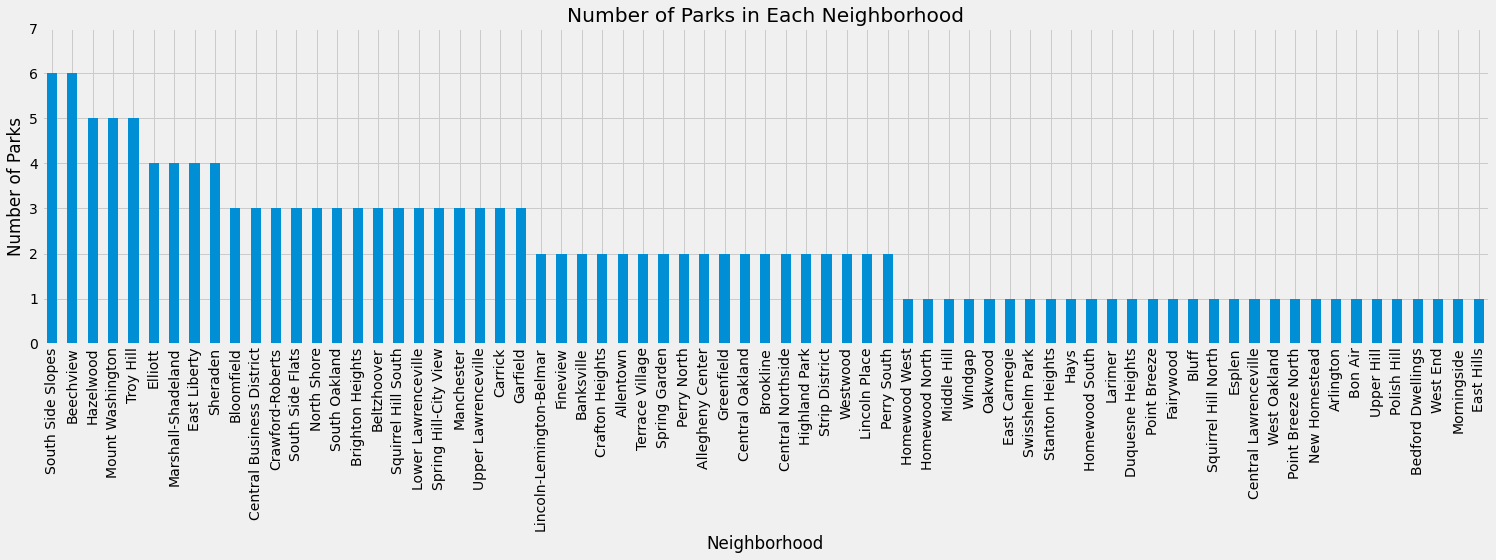

In [55]:
import matplotlib.pyplot as plt #import pyplot library for data visualization

# format and style
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [21, 8]
plt.rcParams["figure.autolayout"] = True

ax = nbhd.plot(kind='bar', linewidth=1, title = "Number of Parks in Each Neighborhood", ylim = [0, 7])

# set axis labels
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Number of Parks")


<br>
Zoom in on top ten neighborhoods for easier comparison

Text(0, 0.5, 'Number of Parks')

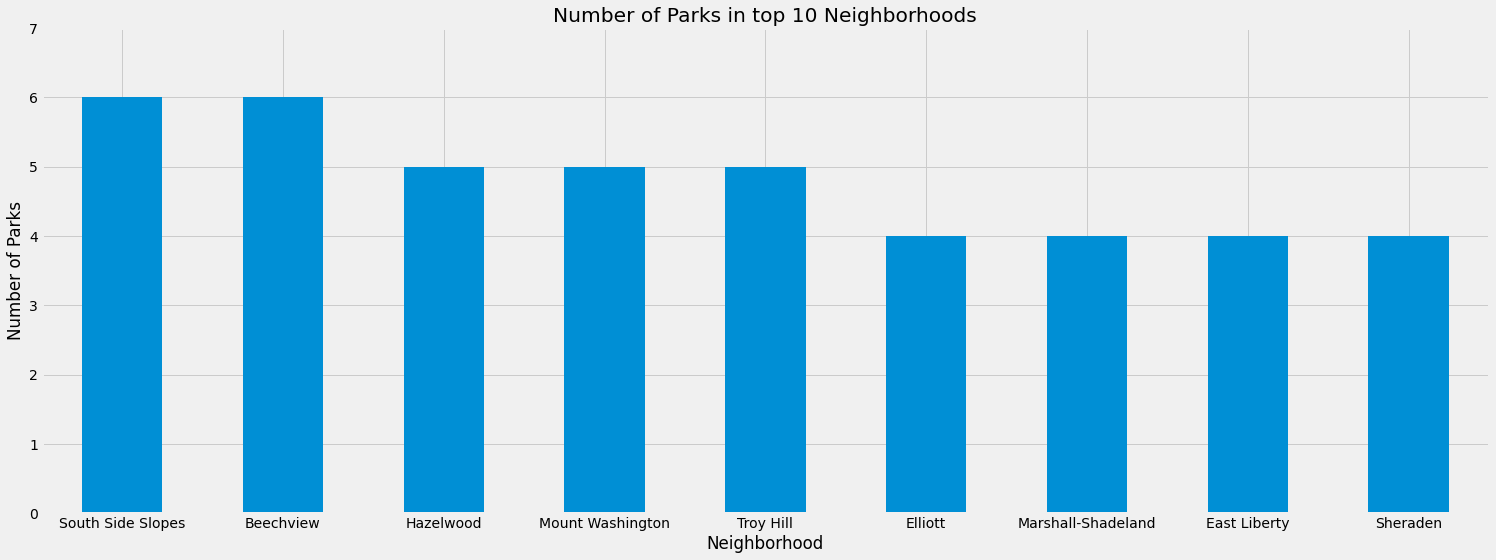

In [56]:
ax = nbhd.head(9).plot(kind='bar', linewidth=1, rot = 0, title = "Number of Parks in top 10 Neighborhoods", ylim = [0,7])
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Number of Parks")


## Conclusion

After analyzing the park data, I have come to a conclusion that South Side Slopes and Beechview are both the best neighborhoods in terms of quality of life. These two neighborhoods have six parks within them which is more than any other neighborhood in the data set. I can narrow this down even further by looking at the areas of South Side Slopes and Beechview. Out of the two, the neighborhood with the smaller area with be the best neighborhood because that means it takes people less time on average to travel to a park which is a better quality of life. South Side Slopes has an area of approximately 0.716 square miles, and Beechview has an area of approximately 1.460 square miles. South Side Slopes is the best neighborhoods in terms of quality of life.